In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import matplotlib.pyplot as plt

In [2]:
train_directory = "C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask Dataset/Train/"
val_directory = "C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask Dataset/Validation/"
test_directory = "C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask Dataset/Test/"

In [3]:
label_train = []
path_train = []
for dirname, _,filenames in os.walk(train_directory):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png' or os.path.splitext(filename)[1]=='.jpg':
            label_train.append(os.path.split(dirname)[1])
            path_train.append(os.path.join(dirname,filename))
            
df_train = pd.DataFrame(columns=['path','label'])
df_train['path']=path_train
df_train['label']=label_train
df_train

,path,label
0,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,With Mask
1,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,With Mask
2,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,With Mask
3,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,With Mask
4,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,With Mask
...,...,...
9995,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,Without Mask
9996,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,Without Mask
9997,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,Without Mask
9998,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,Without Mask


In [4]:
valid_label = []
valid_path = []
for dirname, _,filenames in os.walk(val_directory):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png' or os.path.splitext(filename)[1]=='.jpg':
            valid_label.append(os.path.split(dirname)[1])
            valid_path.append(os.path.join(dirname,filename))
            
df_valid = pd.DataFrame(columns=['path','label'])
df_valid['path']=valid_path
df_valid['label']=valid_label
df_valid

,path,label
0,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,With Mask
1,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,With Mask
2,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,With Mask
3,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,With Mask
4,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,With Mask
...,...,...
795,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,Without Mask
796,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,Without Mask
797,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,Without Mask
798,C:/Users/ASUS/Desktop/MASK_DETECTION/Face Mask...,Without Mask


In [5]:
total_train=df_train.shape[0]
total_valid=df_valid.shape[0]

In [6]:
df_train.label.value_counts()

With Mask       5000
Without Mask    5000
Name: label, dtype: int64

In [7]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=15,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(df_train,
                                                  x_col='path',y_col='label',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode="categorical")

valid_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

valid_generator = valid_datagen.flow_from_dataframe(df_valid,
                                                   x_col='path',y_col='label',
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode="categorical")

Found 10000 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


In [8]:
train_generator.class_indices

{'With Mask': 0, 'Without Mask': 1}

In [9]:
vgg_model=tensorflow.keras.applications.vgg16.VGG16()

In [10]:
model=Sequential()
for layer in vgg_model.layers:
    model.add(layer)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [12]:
model.pop()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [14]:
for layer in model.layers:
    layer.trainable=False

In [15]:
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [16]:
model.compile(optimizer=keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history= model.fit_generator(train_generator,
                   epochs=20,
                   validation_data=valid_generator,
                   validation_steps= total_valid//32,
                   steps_per_epoch= total_train//32)

C:\users\asus\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
312/312 [==============================] - 142s 425ms/step - loss: 0.1124 - accuracy: 0.9581 - val_loss: 0.0431 - val_accuracy: 0.9862
Epoch 2/20
312/312 [==============================] - 106s 339ms/step - loss: 0.0281 - accuracy: 0.9929 - val_loss: 0.0328 - val_accuracy: 0.9887
Epoch 3/20
312/312 [==============================] - 107s 343ms/step - loss: 0.0222 - accuracy: 0.9938 - val_loss: 0.0292 - val_accuracy: 0.9887
Epoch 4/20
312/312 [==============================] - 108s 345ms/step - loss: 0.0178 - accuracy: 0.9949 - val_loss: 0.0244 - val_accuracy: 0.9900
Epoch 5/20
312/312 [==============================] - 109s 349ms/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.0219 - val_accuracy: 0.9912
Epoch 6/20
312/312 [==============================] - 108s 346ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.0204 - val_accuracy: 0.9925
Epoch 7/20
312/312 [==============================] - 108s 346ms/step - loss: 0.0136 - accuracy: 0.9966 - val_loss: 0.0238 -

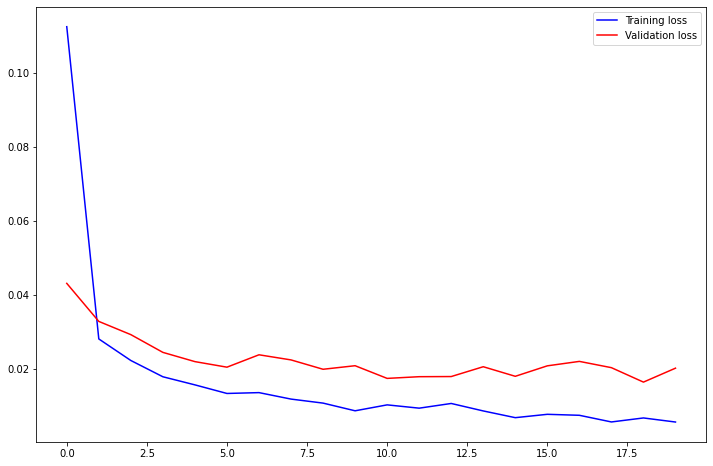

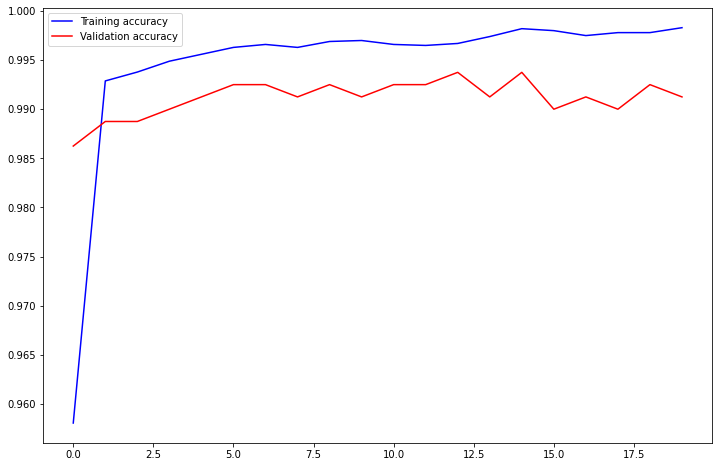

In [21]:
import matplotlib.pyplot as plt
#Loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()
#Accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend()
plt.show()

In [20]:
from tensorflow.keras.models import save_model
save_model(model, "mask_detection_model.h5")